In [1]:
# Importing all the libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading the csv file

df = pd.read_csv("data _Full.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

/home/knoldus/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

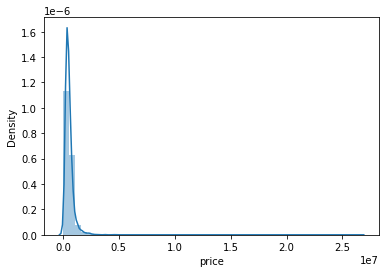

In [5]:
# Data preprocessing

# Distribution of our data
sns.distplot(df['price'])

In [6]:
# To check the missing values

df[df.isnull()].count()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

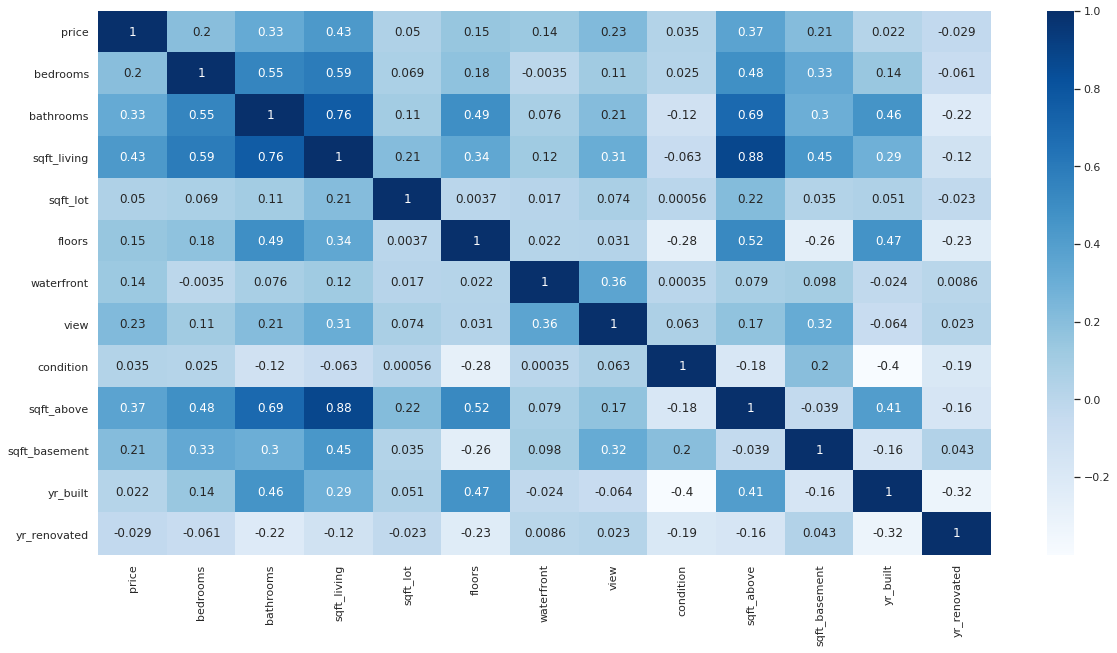

In [7]:
#checking all the columns through boxPlot

sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [8]:
# sqft_living is higly correlated to sqft_above, and sqft_living and bathrooms as well

df.drop(['sqft_living'],axis = 1,inplace=True)

In [9]:
# Checking how many counts of each type of country we have in our dataset

df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [10]:
# Dropping country column as we have unique value i.e., USA

df.drop('country',axis = 1,inplace=True)

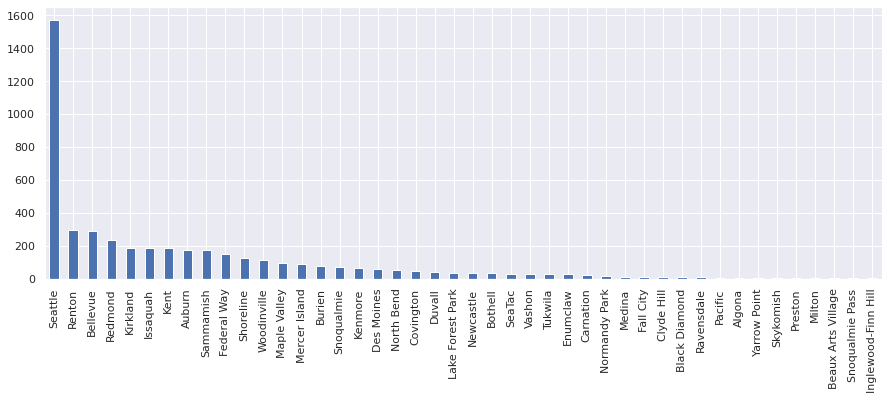

In [11]:
# Checking city column

plt.figure(figsize=(15,5))
df.city.value_counts().plot.bar()
plt.show()

In [12]:
# As we can see we have seattle country as most, so we keeping only that data

df1 = df[df['city'] == 'Seattle']

In [13]:
# Dropping certain fields

df1.drop(['city','street','date','waterfront'],axis = 1,inplace=True)

/home/knoldus/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# To scale statezip column 

le = LabelEncoder()
df1['statezip'] = le.fit_transform(df1['statezip'])

<ipython-input-14-4238e5bd7c9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['statezip'] = le.fit_transform(df1['statezip'])


/home/knoldus/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

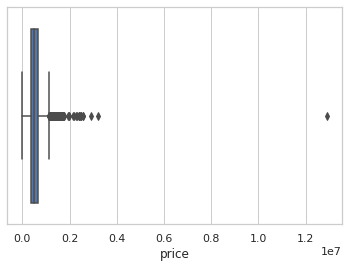

In [15]:
# To check the outliers we are making boxplot

sns.set_theme(style="whitegrid")
sns.boxplot(df1['price'])

In [16]:
#Here, we are replacing outliers with 0 value

#df1["price"] = df1["price"][df1["price"].between(df1["price"].quantile(.15), df1["price"].quantile(.85))]

median = df1['price'].median()
std = df1['price'].std()
outliers = (df1['price'] - median).abs() > std
df1[outliers] = np.nan

#df1['price'].fillna(median, inplace=True)

df1.fillna(0, inplace=True)

<ipython-input-16-20a80833e5ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[outliers] = np.nan
/home/knoldus/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/knoldus/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/home/knoldus/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

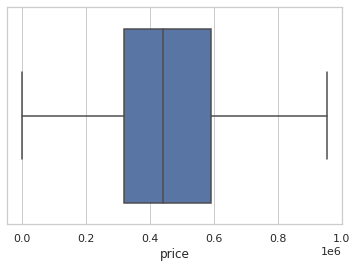

In [17]:
# checking how the boxplot is looking now

sns.set_theme(style="whitegrid")
sns.boxplot(df1['price'])

In [18]:
# Here, we are disturbing our data as X and Y i.e.,(Training and Testing Data)

X = df1.drop(['price'],axis = 1)
Y = df1[['price']]

In [19]:
X

,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.00,6380.0,1.0,0.0,3.0,880.0,0.0,1938.0,1994.0,8.0
9,4.0,2.00,6200.0,1.5,0.0,3.0,1520.0,0.0,1945.0,2010.0,8.0
11,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,3.0,1.00,6435.0,1.0,0.0,4.0,1090.0,0.0,1955.0,2009.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4582,2.0,1.00,4650.0,1.0,0.0,4.0,1290.0,0.0,1906.0,1990.0,8.0
4585,3.0,1.00,3330.0,1.5,0.0,4.0,1390.0,500.0,1901.0,0.0,1.0
4591,3.0,1.75,5752.0,1.0,0.0,4.0,940.0,940.0,1945.0,0.0,15.0
4595,3.0,1.75,6360.0,1.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,16.0


In [20]:
Y

,price
1,0.000000
5,490000.000000
9,640000.000000
11,0.000000
13,365000.000000
...,...
4582,406062.500000
4585,486895.000000
4591,396166.666667
4595,308166.666667


In [21]:
#Implementing Liner Regression Model

model = LinearRegression()

In [22]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [23]:
# Fitting the model

model.fit(X_train, y_train)

LinearRegression()

In [24]:
#Checking the score

model.score(X_test, y_test)

0.7138752170118379

In [25]:
#Prediciting the values

y_pred = model.predict(X_test)  
x_pred = model.predict(X_train) 

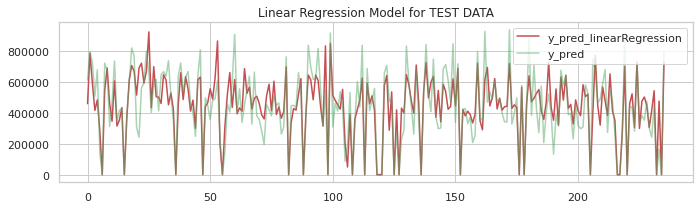

In [26]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
plt.plot(range(0,len(y_pred)),y_pred,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Linear Regression Model for TEST DATA')
plt.legend(['y_pred_linearRegression','y_pred'])

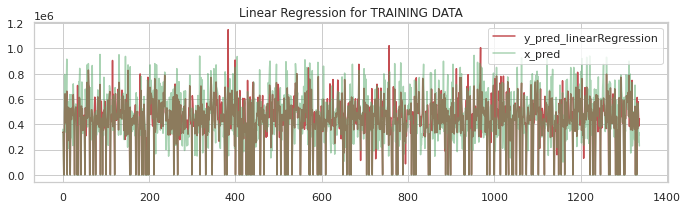

In [27]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
plt.plot(range(0,len(x_pred)),x_pred,c='r')
plt.plot(range(0,len(y_train)),y_train,c='g',alpha=0.5)
plt.title('Linear Regression for TRAINING DATA')
plt.legend(['y_pred_linearRegression','x_pred'])